# TASKS:

1.) Find distribution of observations by brand

2.) Find distribution of observations by year

3.) Find distribution of observations by state

4.) Find distribution of observations by color

5.) Find distribution of price by brand

TODO: 6.) Find distribution of price by year

TODO: 7.) Find distribution of price by state

TODO: 8.) Find distribution of price by color

TODO: 9.) Prep data for modeling

TODO: 10.) Create models that predict price

TODO: CLEAN UP THE VISUALS SO THAT THE LABELS AREN'T OVERLAPPING

---

IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('fivethirtyeight')


CHECKING OUT THE INITIAL DATA

In [ ]:
# --------------------
# CREATING INITIAL DF
# --------------------
df1 = pd.read_csv('./input/USA_cars_datasets.csv')
df1.drop(columns=['Unnamed: 0'],inplace=True,axis=1)
df1.isnull().sum()
df1.head()


In [ ]:
# ----------
# COLUMNS
# ----------
df1.columns


In [ ]:
# ------------
# DATA TYPES
# ------------
df1.dtypes


In [ ]:
# ------------------
# DATA DESCRIPTION
# ------------------
df1.describe()


DATA WRANGLING

In [ ]:
# -------------------------------------------
# CREATING AN AVERAGE PRICE COLUMN BY BRAND
# -------------------------------------------
df1['average_price'] = df1.groupby('brand')['price'].transform('mean')
df1['average_price']


In [ ]:
# -----------------------------------------------
# FINDING OUTLIERS THAT HAVE A PRICE BELOW 100,
# 0 IN MANY CASES. THESE OBSERVATIONS ARE
# SKEWING THE DATA
# -----------------------------------------------
df2 = df1[df1['price'] <= 100]
df2


In [ ]:
# ----------------------------------------------------------------
# REPLACING THE df2 PRICES WITH THE AVERAGE PRICE FOR THAT BRAND
# ----------------------------------------------------------------
df2['price'] = df2['average_price']
df2


In [ ]:
# ---------------------------------------------------------
# DROPPING THE ROWS FROM df1 WHERE PRICE IS LESS THAN 100
# ---------------------------------------------------------
drop_index = df1[df1['price'] <= 100].index
df1.drop(drop_index, inplace=True)


In [ ]:
# ------------------------------------------------------
# CREATING A THIRD DF. df3 = df1 + df2
# ------------------------------------------------------
df3 = pd.concat([df1, df2], ignore_index=True)
df3


1.) FIND DISTRIBUTION OF OBSERVATIONS BY BRAND

In [ ]:
# -------------------------------------------------------------
# CHECKING THE VALUE COUNTS BY BRAND
# -------------------------------------------------------------
df3['brand'].value_counts()


In [ ]:
# --------------------------------------------------
# PLOTTING THE BREAKDOWN OF THE CARS SOLD BY BRAND
# --------------------------------------------------
fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(x='brand', data=df3, ax=ax)


2.) FIND DISTRIBUTION OF OBSERVATIONS BY YEAR

In [ ]:
# ------------------------------
# COUNT OF DATA POINTS BY YEAR
# ------------------------------
# df3.groupby('year')['year'].counts()
df3['year'].value_counts()


In [ ]:
# --------------------------------------------------
# PLOTTING THE BREAKDOWN OF THE CARS SOLD BY YEAR
# --------------------------------------------------
fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(x='year', data=df3, ax=ax)


In [ ]:
# ---------------------------------------------
# CREATING A NEW DF THAT ONLY CONTAINS DATA
# FROM THE LAST 6 YEARS
# ---------------------------------------------
df4 = df3[np.logical_or.reduce([
    df3['year']==2015,
    df3['year']==2016,
    df3['year']==2017,
    df3['year']==2018,
    df3['year']==2019,
    df3['year']==2020]
)]
df4.head()


In [ ]:
# ------------------------------------------
# LOOKING AT THE BREAKDOWN OF THE CAR DATA
# IN THE NEW DF BY YEAR
# ------------------------------------------
# df4.groupby('year')['year'].count()
df4['year'].value_counts()


In [ ]:
# ------------------------------------------------------
# PLOTTING THE BREAKDOWN OF THE MORE PREVALENT YEARS
# ------------------------------------------------------
fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(x='year', data=df4, ax=ax)


3.) FIND DISTRIBUTION OF OBSERVATIONS BY STATE

In [ ]:
# ---------------------------------------------------
# LOOKING AT THE BREAKDOWN OF THE CAR DATA BY STATE
# ---------------------------------------------------
# df4.groupby('state')['state'].count()
df4['state'].value_counts()


In [ ]:
# ------------------------------------------------------
# PLOTTING THE BREAKDOWN BY STATE
# ------------------------------------------------------
fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(x='state', data=df4, ax=ax)


4.) FIND DISTRIBUTION OF OBSERVATIONS BY COLOR

In [ ]:
# ---------------------------------------------------
# LOOKING AT THE BREAKDOWN OF THE CAR DATA BY COLOR
# ---------------------------------------------------
df4['color'].value_counts()


In [ ]:
# ------------------------------------------------------
# PLOTTING THE BREAKDOWN BY COLOR
# ------------------------------------------------------
fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(x='color', data=df4, ax=ax)


5.) FIND DISTRIBUTION OF PRICE BY BRAND

In [ ]:
# ---------------------------------
# FINDING AVERAGE PRICE BY BRAND
# ---------------------------------
df4.groupby('brand')['price'].mean()


Something seems to be skewing the price. The Average price of
maserati probably shouldn't be lower than lincoln.

In [ ]:
# -----------------------------------------------------
# CHECKING THE MIN PRICE OF EACH BRAND
# -----------------------------------------------------
df4.groupby('brand')['price'].min()


In [ ]:
# -----------------------------------------------------
# CHECKING THE MAX PRICE OF EACH BRAND
# -----------------------------------------------------
df4.groupby('brand')['price'].max()


In [ ]:
# -----------------------------------------------------
# CHECKING THE MAX PRICE OF EACH BRAND
# -----------------------------------------------------
df4.groupby('brand')['price'].median()


Ah, the average price is skewed because many of the brands
only have 1 or a few observations. Duh.

In [ ]:
# -------------------------------------------
# CHECKING WHICH BRANDS ARE MOST PROMINENT
# -------------------------------------------
df4['brand'].value_counts()


In [ ]:
# -------------------------------------------------
# CREATING A NEW DF, df5, THAT ONLY HAS THE 4 MOST
# PROMINENT BRANDS. EACH FAR MORE PROMINENT THAN
# THE 5TH MOST
# -------------------------------------------------
df5 = df4[
    (df4['brand'] == 'ford') |
    (df4['brand'] == 'dodge') |
    (df4['brand'] == 'nissan') |
    (df4['brand'] == 'chevrolet')
]
df5.head()


In [ ]:
# -------------------------------------------------------
# GETTING THE AVG PRICE OF THE 4 MOST PROMINENT BRANDS
# -------------------------------------------------------
common_means_price = df5.groupby('brand')['price'].mean()
common_means_price


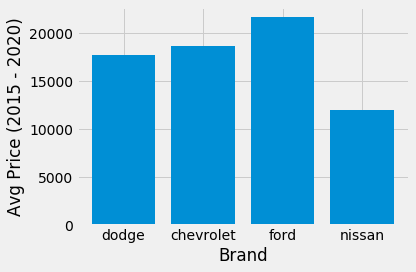

In [96]:
# -------------------------------------------------------
# PLOTTING THE AVG PRICE OF THE 4 MOST PROMINENT BRANDS
# ------------------------------------------------------
plt.bar(df5['brand'], df5['average_price'])
plt.xlabel('Brand')
plt.ylabel('Avg Price (2015 - 2020)')
plt.tight_layout()
plt.show()
